In [1]:
import numpy
import matplotlib.pyplot as plt
import pandas
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

/home/bartek/.local/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [43]:
# fix random seed for reproducibility
numpy.random.seed(7)

In [44]:
# convert an array of values into a dataset matrix
def create_dataset(dataset,windows_size, look_ahead=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-window_size-look_ahead-1):
        a = dataset[i:(i+window_size), 0]
        b= datasetB[i:(i+window_size),0]
        dataX.append((a,b))
        dataY.append(dataset[i+window_size + look_ahead-1, 0])
    return numpy.array(dataX), numpy.array(dataY)

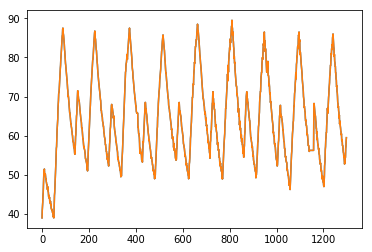

In [87]:
P1dataset = pandas.read_csv('piec.csv', usecols=[2], engine='python', skipfooter=3)
P2dataset= pandas.read_csv('piec.csv', usecols=[2], engine='python', skipfooter=3)
plt.plot(P1dataset)
plt.plot(P2dataset)
plt.show()

In [88]:
P1dataset.tail(4)

,V1
1295,56.75
1296,57.25
1297,58.75
1298,59.50


In [89]:
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
scalerB= MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(P1dataset)
datasetB = scalerB.fit_transform(P2dataset)


In [90]:
datasetB

array([[0.        ],
       [0.03960396],
       [0.05940594],
       ...,
       [0.36138614],
       [0.39108911],
       [0.40594059]])

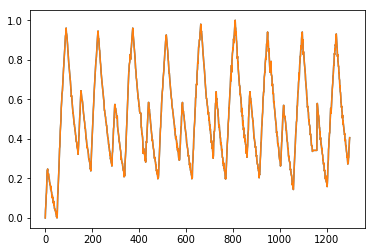

In [91]:
plt.plot(dataset)
plt.plot(datasetB)
plt.show()

In [92]:
dataset

array([[0.        ],
       [0.03960396],
       [0.05940594],
       ...,
       [0.36138614],
       [0.39108911],
       [0.40594059]])

In [93]:
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

870 429


In [94]:
# reshape into X=t and Y=t+1
look_back = 5
window_size=10
trainX, trainY = create_dataset(train, window_size,look_back)
testX, testY = create_dataset(test, window_size,look_back)

In [95]:
testX.shape

(413, 2, 10)

In [96]:
trainX[0:8]

array([[[0.        , 0.03960396, 0.05940594, 0.07920792, 0.11386139,
         0.12871287, 0.17326733, 0.2029703 , 0.23762376, 0.23762376],
        [0.        , 0.03960396, 0.05940594, 0.07920792, 0.11386139,
         0.12871287, 0.17326733, 0.2029703 , 0.23762376, 0.23762376]],

       [[0.03960396, 0.05940594, 0.07920792, 0.11386139, 0.12871287,
         0.17326733, 0.2029703 , 0.23762376, 0.23762376, 0.24752475],
        [0.03960396, 0.05940594, 0.07920792, 0.11386139, 0.12871287,
         0.17326733, 0.2029703 , 0.23762376, 0.23762376, 0.24752475]],

       [[0.05940594, 0.07920792, 0.11386139, 0.12871287, 0.17326733,
         0.2029703 , 0.23762376, 0.23762376, 0.24752475, 0.22277228],
        [0.05940594, 0.07920792, 0.11386139, 0.12871287, 0.17326733,
         0.2029703 , 0.23762376, 0.23762376, 0.24752475, 0.22277228]],

       [[0.07920792, 0.11386139, 0.12871287, 0.17326733, 0.2029703 ,
         0.23762376, 0.23762376, 0.24752475, 0.22277228, 0.21782178],
        [0.07920792, 

In [97]:
trainY[1]

0.20792079207920788

In [98]:
# reshape input to be [samples, time steps, features]
#trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
#testX = testX.reshape(testX.shape[0],  testX.shape[1],1)
#testX = testX.reshape(testX.shape + (1,))
#trainX=trainX.reshape(trainX.shape+ (1,))

In [99]:
trainX.shape
#dataset.shape

(854, 2, 10)

In [100]:
trainX.reshape(-1,4)

array([[0.        , 0.03960396, 0.05940594, 0.07920792],
       [0.11386139, 0.12871287, 0.17326733, 0.2029703 ],
       [0.23762376, 0.23762376, 0.        , 0.03960396],
       ...,
       [0.32178218, 0.35148515, 0.4009901 , 0.37128713],
       [0.37128713, 0.34653465, 0.32673267, 0.35148515],
       [0.32673267, 0.30693069, 0.32178218, 0.35148515]])

In [101]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(2,window_size)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=20, batch_size=1, verbose=1)

Epoch 1/20
854/854 [==============================] - 1s 2ms/step - loss: 0.0271
Epoch 2/20
854/854 [==============================] - 1s 1ms/step - loss: 0.0060
Epoch 3/20
854/854 [==============================] - 1s 1ms/step - loss: 0.0039
Epoch 4/20
854/854 [==============================] - 1s 1ms/step - loss: 0.0037
Epoch 5/20
854/854 [==============================] - 1s 2ms/step - loss: 0.0036
Epoch 6/20
854/854 [==============================] - 1s 2ms/step - loss: 0.0034
Epoch 7/20
854/854 [==============================] - 1s 2ms/step - loss: 0.0034
Epoch 8/20
854/854 [==============================] - 1s 2ms/step - loss: 0.0033
Epoch 9/20
854/854 [==============================] - 1s 2ms/step - loss: 0.0032
Epoch 10/20
854/854 [==============================] - 1s 2ms/step - loss: 0.0032
Epoch 11/20
854/854 [==============================] - 1s 2ms/step - loss: 0.0031
Epoch 12/20
854/854 [==============================] - 1s 1ms/step - loss: 0.0031
Epoch 13/20
854/854 [====

In [102]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

In [103]:
#trainPredict.reshape(-1)
#trainPb = numpy.append(trainPredict,numpy.zeros([len(trainPredict),1]),1)
#trainYb=numpy.append(trainY,numpy.zeros([len(trainY),1]),0)
#testPredict.reshape(-1)



In [104]:
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

In [105]:
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.3f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.3f RMSE' % (testScore))

Train Score: 2.483 RMSE
Test Score: 4.368 RMSE


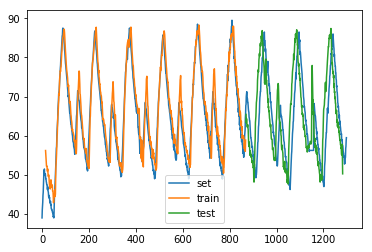

In [86]:
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
wws=window_size+look_back;
trainPredictPlot[wws:len(trainPredict)+wws, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+wws+1:len(dataset)-window_size-look_back-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset),label="set")
plt.plot(trainPredictPlot,label="train")
plt.plot(testPredictPlot,label="test")
plt.legend()
plt.show()